## <span style="color:blue">What is Feature Reduction ? </span>


 
- <span style="color:darkgreen"> Machine Learning models especially the "Classical Statistical" models such as Linear and Logistic Regression do not perform well if we have multiple independent features in the dataset that provide similar information. This gives rise to a concept known as multicollinearity which leads to one of the biggest issues when dealing with data modeling– Overfitting. </span>


- <span style="color:darkgreen"> Multicollinearity is caused when we have multiple correlated features. There are various ways of finding such variables and getting rid of them. </span>
 
<br> 
 
 
 ## <span style="color:blue">What is Feature Selection ? </span>
 
 
- <span style="color:darkgreen"> Among the various ways of Reducing Features is Feature Selection where we explicitly select the features we want to use in our model. </span>
 
 
- <span style="color:darkgreen"> Similarly, rather than selecting the features, we can also concentrate on the features we don't want to keep and methods that do so will also be considered as Feature Selection methods. </span>
 
 <br> 
 
 
## <span style="color:blue"> What is Embedded Methods ? </span>

- <span style="color:darkgreen"> Embedded Methods are a range of Feature Selection methods where we drop variables based on there coefficient values. </span>


- <span style="color:darkgreen"> Embedded Methods use a concept called regularization where the coefficients are forced to be spread out more equally among all the features. When we have a lot of features, then the coefficients tend to inflate even of those features which are not useful or are correlated with other features. Regularization methods force such coefficients to shrink. </span>


<br> 
 
## <span style="color:blue"> What is Ridge, Lasso and Elastic Net ? </span>

- <span style="color:darkgreen"> Ridge, Lasso and Elastic are the various methods through which we can create Regression Models that perfrom different kinds of Regularization </span>


- <span style="color:darkgreen"> Each of these methods uses different kinds of "regularization norms" which based on there mathematical methodology have different effects on the coefficients of the features. </span>
     - <span style="color:darkgreen"> **Ridge** </span>: <span style="color:seagreen"> Ridge uses a **L2 norm** where the coefficients are penalized for being too large than what they should be if multicollinearity wasn't there. L2 norm shrinks the coefficients but never makes them 0. </span>
      
     - <span style="color:darkgreen"> **Lasso** </span>: <span style="color:seagreen"> Lasso uses a **L1 norm** where the coefficients can penalized to such an extent that coefficients can become 0 </span>
      
     - <span style="color:darkgreen"> **Elastic Net** </span>: <span style="color:seagreen"> It performs a combination of  **L1 & L2 norm**.</span>
     

<br>


## <span style="color:blue"> What is alpha ? </span>

- <span style="color:darkgreen"> Alpha is the strength of the penalty imposed on the coefficients </span>
- <span style="color:darkgreen"> If we use L2 norm the penalty is equal to the square of the magnitude of coefficients</span>
- <span style="color:darkgreen"> In L1 norm, the penalty is equal to the absolute value of the magnitude of coefficients</span>
- <span style="color:darkgreen"> We control this by using the argument "alpha = N" in Python. </span>
- <span style="color:darkgreen"> Note: The formula for all these methods is such that if alpha is set at 0, it will become Ridge and if alpha is equal to 1 then it becomes Lasso. Therefore, for e.g. If we use Ridge with alpha=0 and Elastic with alpha=0, the output of both of them will be same as the Lasso will behave like Ridge only.</span>



<br> 
 
## <span style="color:blue"> How to use Regularization ? </span>

- <span style="color:darkgreen"> **Feature Reduction** : Regularization can be used during Regularized Regression where coefficients are generated. We can use Regularized Regression for finding the coefficients that are very less is  value (Ridge/Elastic) or have no value (Lasso) and drop such features thus performing Feature Reduction. These remaining features then can be used for creating a Machine Learning Model </span>


- <span style="color:darkgreen"> **Predictive Modeling** : We can also directly use Regularized Regression for predictive modeling where use we perform no feature deduction (or do perfrom using other methods) and input the features in the Regularized Regression model and get the predictions. In this method we take little to no stress regarding feature reduction as the problem of multicolinearity is taken care of by the regulatory norms.</span>

# Data Preparation

We will import and prepare a dataset and will use it for:
<br>
( i )  Feature Reduction using Regularization Methods
<br>
( ii )  Perform Predictive Modeling using Regularized Regression

### Importing Basic Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn import metrics

### Importing Data

We use the "Boston" dataset that can be accessed using the sklearn package.

In [4]:
from sklearn.datasets import load_boston

In [5]:
BostonData = load_boston()

In [6]:
type(BostonData)

sklearn.utils.Bunch

In [7]:
print(dir(BostonData))

['DESCR', 'data', 'feature_names', 'filename', 'target']


#### Understanding the Boston Data

In [8]:
# whats included
BostonData.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
# The feature names in the Boston Dataset
BostonData.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
# Description of the Boston Dataset
print(BostonData.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
# Saving the Boston dataset's data as Pandas DataFrame from the data key 
# (that has all the independent variables)
BosData = pd.DataFrame(BostonData.data)
BosData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
# Adding the feature names by using the feature_names key
BosData.columns = BostonData.feature_names
BosData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
# Adding the dependent (Y) variable available in the target key
BosData['PRICE'] = BostonData.target
BosData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### udfs

In [17]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.nunique(), x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['C','N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

### Performing Basic Checks

We look for the missing values in the dataset and the distribution of the Y variable

In [18]:
BosData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [19]:
# get the data audit report for all the variables
BosData.apply( continuous_var_summary )

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
C,504.000000,26.000000,76.000000,2.000000,81.000000,446.000000,356.000000,412.000000,9.000000,66.000000,46.000000,357.000000,455.000000,229.000000
N,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
NMISS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SUM,1828.442920,5750.000000,5635.210000,35.000000,280.675700,3180.025000,34698.900000,1920.291600,4832.000000,206568.000000,9338.500000,180477.060000,6402.450000,11401.600000
MEAN,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
MEDIAN,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
STD,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
VAR,73.986578,543.936814,47.064442,0.064513,0.013428,0.493671,792.358399,4.434015,75.816366,28404.759488,4.686989,8334.752263,50.994760,84.586724
MIN,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
P1,0.013610,0.000000,1.253500,0.000000,0.398000,4.524450,6.610000,1.206540,1.000000,188.000000,13.000000,6.730000,2.883000,7.010000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


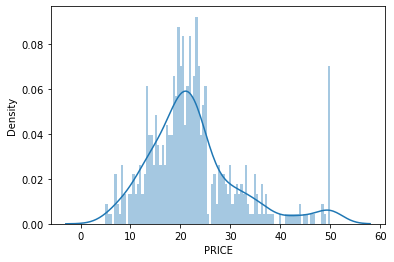

In [20]:
# Distribution of the Y variable seems close to normal
sns.distplot(BosData.PRICE, bins = 100)
plt.show()

In [21]:
# Measuring the skewness in the

1.1080984082549072

In [22]:
# Performing Log Transformation to check if it makes the distribution more normal 
BosData['LN_PRICE'] = np.log( BosData['PRICE'] )

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


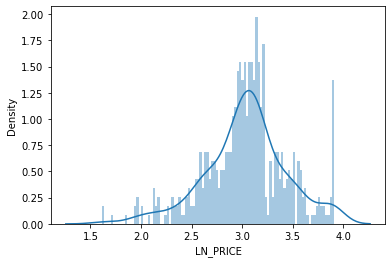

In [23]:
# Distribution of the log Y variable also seems close to normal
sns.distplot(BosData.LN_PRICE, bins = 100)
plt.show()

In [24]:
# Measuring the skewness in the log Y variable's distribution
# The skewness in the log Y is less than Y (closer to 0) therefore we will proceed with log Y
BosData['LN_PRICE'].skew()

-0.33032129530987864

### train and test split

In [25]:
# Creating train and Test Dataset
X = BosData[ BosData.columns.difference([ 'PRICE', 'LN_PRICE' ]) ]
Y = BosData['LN_PRICE']

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 123 )

#### Using Regularization for performing Feature Reduction

In [27]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [21]:
print(dir(linear_model))

['ARDRegression', 'BayesianRidge', 'ElasticNet', 'ElasticNetCV', 'GammaRegressor', 'Hinge', 'Huber', 'HuberRegressor', 'Lars', 'LarsCV', 'Lasso', 'LassoCV', 'LassoLars', 'LassoLarsCV', 'LassoLarsIC', 'LinearRegression', 'Log', 'LogisticRegression', 'LogisticRegressionCV', 'ModifiedHuber', 'MultiTaskElasticNet', 'MultiTaskElasticNetCV', 'MultiTaskLasso', 'MultiTaskLassoCV', 'OrthogonalMatchingPursuit', 'OrthogonalMatchingPursuitCV', 'PassiveAggressiveClassifier', 'PassiveAggressiveRegressor', 'Perceptron', 'PoissonRegressor', 'RANSACRegressor', 'Ridge', 'RidgeCV', 'RidgeClassifier', 'RidgeClassifierCV', 'SGDClassifier', 'SGDRegressor', 'SquaredLoss', 'TheilSenRegressor', 'TweedieRegressor', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_bayes', '_cd_fast', '_coordinate_descent', '_glm', '_huber', '_least_angle', '_logistic', '_omp', '_passive_aggressive', '_perceptron', '_ransac', '_ridge', '_sa

### Using Linear Regression to come up with the Coefficients

In [28]:
# Initializing Model
linreg_model = linear_model.LinearRegression()

In [30]:
# Fitting Model
ln_model = linreg_model.fit( X_train, y_train )

In [31]:
# Predict the outputs
y_train_pred = ln_model.predict( X_train )
y_test_pred = ln_model.predict( X_test )

In [35]:
# evaluate the model using r2
print('R2 train:', metrics.r2_score( y_train, y_train_pred ))
print('R2 test:', metrics.r2_score( y_test, y_test_pred ))
print('\n')

# evaluate the model using mae
print('MAE train:',metrics.mean_absolute_error(y_train, y_train_pred))
print('MAE test:',metrics.mean_absolute_error(y_test, y_test_pred))

R2 train: 0.8092796384717771
R2 test: 0.7184549221719688


MAE train: 0.12567961518799273
MAE test: 0.15228894578869467


In [36]:
linreg_model.intercept_

3.833644376804749

In [37]:
linreg_model.coef_

array([ 2.97145506e-05,  2.39820315e-04,  3.54592278e-02, -1.02765904e-02,
       -4.22811012e-02,  4.59376358e-03, -2.78238079e-02, -6.72617536e-01,
       -3.74388277e-02,  1.40068858e-02,  1.30099073e-01, -6.97731281e-04,
        7.92180304e-04])

In [88]:
Non_Reg_coef = pd.DataFrame( linreg_model.coef_, X_train.columns, columns = ['Non_Reg_Coefficient'] )
Non_Reg_coef

,Non_Reg_Coefficient
AGE,0.000030
B,0.000240
CHAS,0.035459
CRIM,-0.010277
DIS,-0.042281
INDUS,0.004594
LSTAT,-0.027824
NOX,-0.672618
PTRATIO,-0.037439
RAD,0.014007


In [54]:
Non_Reg_coef = pd.DataFrame( linreg_model.coef_, 
                    X_train.columns, columns = ['Non_Reg_Coefficient'] ).reset_index()
Non_Reg_coef

intercept = pd.DataFrame( ['INTERCEPT', linreg_model.intercept_ ] ).T 
intercept.columns = ['index', 'Non_Reg_Coefficient']
intercept

,index,Non_Reg_Coefficient
0,INTERCEPT,3.833644


In [55]:
Non_Reg_coef = pd.concat( [Non_Reg_coef, intercept] )
Non_Reg_coef

,index,Non_Reg_Coefficient
0,AGE,0.00003
1,B,0.00024
2,CHAS,0.035459
3,CRIM,-0.010277
4,DIS,-0.042281
5,INDUS,0.004594
6,LSTAT,-0.027824
7,NOX,-0.672618
8,PTRATIO,-0.037439
9,RAD,0.014007


### https://scikit-learn.org/stable/modules/model_evaluation.html

### Using Ridge for performing Feature Reduction

In [61]:
GridSearchCV?

In [73]:
# Initializing Model
tuned_parameters = { 'alpha': [0.01, 0.1, 1, 10, 100] }

RidgeCV = GridSearchCV( linear_model.Ridge(),
                        tuned_parameters,
                        cv = 10,
                        n_jobs = -1,
                        scoring = 'neg_mean_squared_error',
                        verbose = 1
                      ).fit(X_train, y_train)

print('Best combination:', RidgeCV.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best combination: {'alpha': 0.1}


In [74]:
RidgeCV.best_score_

-0.03725555508721777

In [30]:
RidgeCV.best_estimator_

Ridge(alpha=0.1)

In [31]:
RidgeCV.best_params_

{'alpha': 0.1}

In [32]:
RidgeCV.best_params_

{'alpha': 0.1}

#### Fitting the final Model

In [75]:
# model fit
Ridge_model = linear_model.Ridge( alpha = 0.1 ).fit( X_train, y_train )

# or we can make use of 
# Ridge_model = RidgeCV.best_estimator_

# predict the y on train and test
y_train_pred = Ridge_model.predict( X_train )
y_test_pred = Ridge_model.predict( X_test )

# evaluate the model using r2
print('R2 train:', metrics.r2_score( y_train, y_train_pred ))
print('R2 test:', metrics.r2_score( y_test, y_test_pred ))

# evaluate the model using mae
print('MAE train:',metrics.mean_absolute_error(y_train, y_train_pred))
print('MAE test:',metrics.mean_absolute_error(y_test, y_test_pred))

R2 train: 0.8092173507666595
R2 test: 0.7173103480108327
MAE train: 0.12534112019185964
MAE test: 0.15242827172855333


In [76]:
y_train_pred = RidgeCV.best_estimator_.predict( X_train )
y_test_pred = RidgeCV.best_estimator_.predict( X_test )

# evaluate the model using r2
print('R2 train:', metrics.r2_score( y_train, y_train_pred ))
print('R2 test:', metrics.r2_score( y_test, y_test_pred ))

# evaluate the model using mae
print('MAE train:',metrics.mean_absolute_error(y_train, y_train_pred))
print('MAE test:',metrics.mean_absolute_error(y_test, y_test_pred))

R2 train: 0.8092173507666595
R2 test: 0.7173103480108327
MAE train: 0.12534112019185964
MAE test: 0.15242827172855333


In [85]:
# Finding the Coefficients
Ridge_coef = pd.DataFrame(Ridge_model.coef_, X_train.columns, columns = ['Ridge_Coefficient'])
Ridge_coef

,Ridge_Coefficient
AGE,-0.000024
B,0.000242
CHAS,0.034306
CRIM,-0.010247
DIS,-0.041346
INDUS,0.004366
LSTAT,-0.027880
NOX,-0.611219
PTRATIO,-0.036826
RAD,0.013813


### Using Lasso for performing Feature Reduction

In [77]:
# Initializing Model
tuned_parameters = {'alpha': [0, 0.00001, 0.0001, 0.001, 0.01, 0.1] }

LassoCV = GridSearchCV( linear_model.Lasso(),
                        tuned_parameters,
                        cv = 5,
                        n_jobs = -1,
                        scoring = 'neg_mean_squared_error',
                        verbose = 10
                      ).fit(X_train, y_train)

print('Best combination:', LassoCV.best_params_);

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best combination: {'alpha': 0.0001}


In [36]:
LassoCV.best_params_

{'alpha': 0.0001}

#### Fitting the final Model

In [78]:
# model fit
# Lasso_model = linear_model.Lasso( alpha = 0.0001 ).fit( X_train, y_train )

Lasso_model = LassoCV.best_estimator_

# predict the y on train and test
y_train_pred = Lasso_model.predict( X_train )
y_test_pred = Lasso_model.predict( X_test )

# evaluate the model using r2
print('R2 train:', metrics.r2_score( y_train, y_train_pred ))
print('R2 test:', metrics.r2_score( y_test, y_test_pred ))

# evaluate the model using mae
print('MAE train:',metrics.mean_absolute_error(y_train, y_train_pred))
print('MAE test:',metrics.mean_absolute_error(y_test, y_test_pred))

R2 train: 0.8092560178198775
R2 test: 0.7176116513605331
MAE train: 0.12548905271361743
MAE test: 0.15240601473608775


In [86]:
# Finding the Coefficients
lasso_coef = pd.DataFrame( Lasso_model.coef_, X_train.columns, columns = ['Lasso_Coefficient'])
lasso_coef

,Lasso_Coefficient
AGE,0.000002
B,0.000241
CHAS,0.033063
CRIM,-0.010258
DIS,-0.041687
INDUS,0.004457
LSTAT,-0.027874
NOX,-0.635791
PTRATIO,-0.037083
RAD,0.013898


### Using Elastic Net for performing Feature Reduction

In [79]:
# Initializing Model
tuned_parameters = { 'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1] }

ElasticNet_CV = GridSearchCV( linear_model.ElasticNet(),
                              tuned_parameters,
                              cv = 5,
                              n_jobs = -1,
                              scoring = 'neg_mean_squared_error',
                              verbose = 10
                            ).fit(X_train, y_train)

print('Best combination:', ElasticNet_CV.best_params_);

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best combination: {'alpha': 0.0001}


#### Fitting the final Model

In [80]:
ElasticNet_CV.best_params_

{'alpha': 0.0001}

In [81]:
# model fit
EN_model = linear_model.ElasticNet( alpha = 0.0001 ).fit( X_train, y_train )

# predict the y on train and test
y_train_pred = EN_model.predict( X_train )
y_test_pred = EN_model.predict( X_test )

# evaluate the model using r2
print('R2 train:', metrics.r2_score( y_train, y_train_pred ))
print('R2 test:', metrics.r2_score( y_test, y_test_pred ))

# evaluate the model using mae
print('MAE train:',metrics.mean_absolute_error(y_train, y_train_pred))
print('MAE test:',metrics.mean_absolute_error(y_test, y_test_pred))

R2 train: 0.8092645938500901
R2 test: 0.7178321031322193
MAE train: 0.12552124198555795
MAE test: 0.15236936778799498


In [83]:
# Finding the Coefficients
elastic_coef = pd.DataFrame(EN_model.coef_, X_train.columns, columns = ['Elastic_Net_Coefficient'])
elastic_coef

,Elastic_Net_Coefficient
AGE,0.000006
B,0.000241
CHAS,0.034048
CRIM,-0.010262
DIS,-0.041810
INDUS,0.004483
LSTAT,-0.027859
NOX,-0.642774
PTRATIO,-0.037147
RAD,0.013916


### Comparing Coefficients

In [89]:
pd.concat( [Non_Reg_coef, Ridge_coef, lasso_coef, elastic_coef ], axis = 1)

,Non_Reg_Coefficient,Ridge_Coefficient,Lasso_Coefficient,Elastic_Net_Coefficient
AGE,0.000030,-0.000024,0.000002,0.000006
B,0.000240,0.000242,0.000241,0.000241
CHAS,0.035459,0.034306,0.033063,0.034048
CRIM,-0.010277,-0.010247,-0.010258,-0.010262
DIS,-0.042281,-0.041346,-0.041687,-0.041810
INDUS,0.004594,0.004366,0.004457,0.004483
LSTAT,-0.027824,-0.027880,-0.027874,-0.027859
NOX,-0.672618,-0.611219,-0.635791,-0.642774
PTRATIO,-0.037439,-0.036826,-0.037083,-0.037147
RAD,0.014007,0.013813,0.013898,0.013916
